In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from src.models.game_set import GameModel
from src.utils import load_target_sample
pd.options.display.float_format = '{:.2f}'.format

In [2]:
temp = load_target_sample()
temp.sample(3)

,Season,team_a,team_b,in_target,game_set
ID,,,,,
2018_1326_1393,2018,1326,1393,True,ncaa
2018_1348_1364,2018,1348,1364,True,ncaa
2018_1314_1393,2018,1314,1393,True,ncaa


In [3]:
temp = load_target_sample().astype({'Season': int})
temp['a_win'] = np.nan
temp['DayNum'] = 366
temp['game_set'] = 0
m = GameModel(temp)

Running Feature Pipeline
-- Seeds --
(2117, 9)
-- Game Features --
(2117, 35)
-- Game Detailed Features --
(2117, 217)
Feature Pipeline Clock: 24 Seconds
Fit Features Loaded: (2117, 211)
Running Feature Pipeline
-- Seeds --
(2278, 9)
-- Game Features --
(2278, 35)
-- Game Detailed Features --
(2278, 217)
Feature Pipeline Clock: 25 Seconds
Pred Features Loaded: (2278, 211)


In [4]:
m.cross_validate()

,log_loss,ncaa_log_loss
mean,0.24,0.24
std,0.02,0.02
min,0.22,0.22
max,0.25,0.25


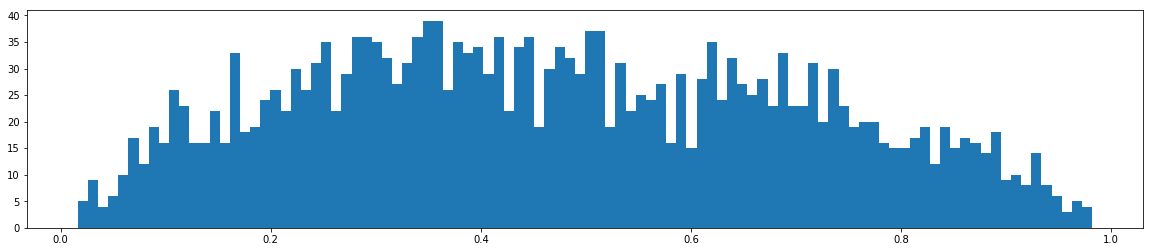

In [5]:
preds = m.fit_predict()
plt.figure(figsize=(20,4))
plt.hist(preds.a_win, bins=100)
plt.show()

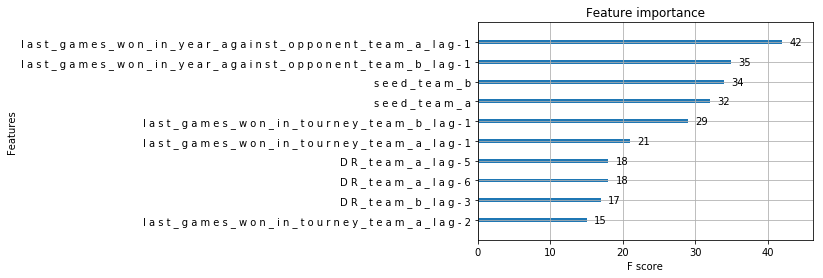

In [6]:
from xgboost import plot_importance

plot_importance(m.estimator, max_num_features=10)
plt.show()